In [1]:
from top2vec import Top2Vec
from gensim.models.coherencemodel import CoherenceModel
import os
import pandas as pd
from nltk.tokenize import word_tokenize

import gensim.corpora as corpora
from utils.config import random_sample,seed

In [2]:
import os
import pandas as pd

In [3]:
from utils.filemanagement import load_from_file, write_topics_file, get_project_root

model_type = "top2vec"
model_name = "Top2Vec"
embedding_model = "universal-sentence-encoder-multilingual"
data_type = "np_mini_stopwords"
file_name=f"{model_type}_{embedding_model}_{data_type}"
folder_path_data =f"preprocessed_data"
file_name_data = f"{data_type}.csv"

experiment="embedding"
folder_path_topics = f"preprocessed_data/results/embedding/{model_type}"
folder_path_word_cloud = f"preprocessed_data/wordclouds/{experiment}/{model_type}/{file_name}"
file_name_data = f"{data_type}.csv"

folder_name = f"Embedding-experiment/models/{model_type}"
ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)


df = load_from_file(folder_path_data,file_name_data)



data = df.text.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))

In [4]:
topic_model = None
try:
    topic_model = Top2Vec.load(file_path)
except:
    print("success")
    topic_model = Top2Vec(documents = new_data, embedding_model="universal-sentence-encoder-multilingual")

In [5]:
topic_model.save(file_path)

In [6]:
print(topic_model.embedding_model)

universal-sentence-encoder-multilingual


In [7]:
num_topics = topic_model.get_num_topics()
print(num_topics)

2


In [8]:
topic_sizes, topic_nums = topic_model.get_topic_sizes()

In [9]:
topic_words, word_scores, topic_nums = topic_model.get_topics(num_topics)

In [10]:
topic_word_scores = [dict(zip(topic_words[i][:], word_scores[i])) for i in topic_nums]

In [11]:
topic_model.get_topics()

(array([['selvfølgelig', 'tilnærming', 'nødvendigvis', 'næringslivet',
         'ønskjer', 'nødvendig', 'høyt', 'lærerne', 'sjølvsagt', 'øvrig',
         'løsning', 'asylsøkere', 'næringsliv', 'nødvendige', 'søke',
         'nærmest', 'løsninger', 'kontantstøtten', 'høyre', 'ønske',
         'løsningen', 'høsten', 'høst', 'ønsker', 'aktører', 'færre',
         'fornøyd', 'lønning', 'støtter', 'sørge', 'støtte', 'høyskoler',
         'hørte', 'høy', 'høre', 'raudgrøne', 'nødt', 'innføre', 'øke',
         'forsøk', 'rødgrønne', 'høyere', 'tilstrekkelig', 'høyres',
         'øvrige', 'ført', 'øker', 'fører', 'gjennomføre', 'gjennomført'],
        ['selvfølgelig', 'nødvendigvis', 'tilnærming', 'næringslivet',
         'lærerne', 'nødvendig', 'næringsliv', 'færre', 'asylsøkere',
         'øvrig', 'høyt', 'nødvendige', 'nærmest', 'ønskjer', 'lærer',
         'tilstrekkelig', 'aktører', 'løsningen', 'kontantstøtten',
         'høyre', 'sjølvsagt', 'løsning', 'søke', 'ordinære', 'sørge',
     

In [12]:
for i in range(num_topics):
    print("\n", i)
    print(topic_word_scores[i])



 0
{'selvfølgelig': 0.5738417, 'tilnærming': 0.5258107, 'nødvendigvis': 0.5106198, 'næringslivet': 0.47864038, 'ønskjer': 0.47417963, 'nødvendig': 0.4703197, 'høyt': 0.46152216, 'lærerne': 0.45930564, 'sjølvsagt': 0.45798215, 'øvrig': 0.45673, 'løsning': 0.45534587, 'asylsøkere': 0.45481938, 'næringsliv': 0.44964296, 'nødvendige': 0.44908884, 'søke': 0.44790995, 'nærmest': 0.44660062, 'løsninger': 0.4465171, 'kontantstøtten': 0.4460082, 'høyre': 0.44327858, 'ønske': 0.43830276, 'løsningen': 0.43717086, 'høsten': 0.43617454, 'høst': 0.43339604, 'ønsker': 0.43003184, 'aktører': 0.42455977, 'færre': 0.4230132, 'fornøyd': 0.42098165, 'lønning': 0.420268, 'støtter': 0.41646504, 'sørge': 0.41634396, 'støtte': 0.4138672, 'høyskoler': 0.41301346, 'hørte': 0.410906, 'høy': 0.41084522, 'høre': 0.40894035, 'raudgrøne': 0.407616, 'nødt': 0.40641904, 'innføre': 0.4050811, 'øke': 0.40382066, 'forsøk': 0.40364787, 'rødgrønne': 0.40208882, 'høyere': 0.40159935, 'tilstrekkelig': 0.40157336, 'høyres': 

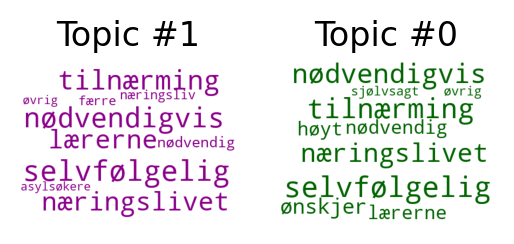

In [13]:

from utils.filemanagement import make_excerpt_wordcloud

excerpt_wordcloud = make_excerpt_wordcloud(topic_word_scores, num_topics,
                                           f"Sample from {model_name}-{embedding_model}: {data_type}",
                                           random_sample=random_sample, seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

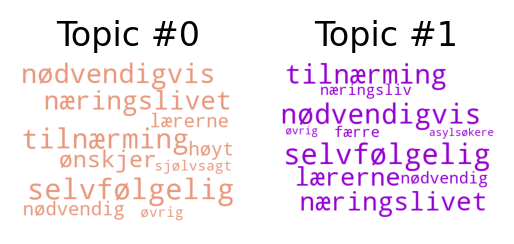

In [14]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds(topic_word_scores, f"{model_name}-{embedding_model}: {data_type}",num_topics, dpi=200)


In [15]:
from utils.tables_and_plots import create_wordcloud

wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))
file_name_model = "wordcloud"
for i in range(num_topics):
    topic_wordcloud = create_wordcloud(topic_word_scores[i])
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [16]:
from utils.filemanagement import write_topics_file

topic_words_numbered = [(i, list(topic_words[i])) for i in range(num_topics)]


write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [17]:
from utils.filemanagement import load_model_topics


loaded_topics = load_model_topics(folder_path_topics, file_name)

In [18]:
folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [19]:
len(loaded_topics.values())

2

In [20]:

from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [21]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [22]:
from utils.stats import compute_metrics
input_data = list(loaded_topics.values())
coherence, diversity = compute_metrics(
    input_data, word_frequencies, word_co_frequencies, 10)

10
('selvfølgelig', 'tilnærming') wordtuple
('selvfølgelig', 'tilnærming') wordup
16.0 over
26506.0 under
-10.694031350185641 -4.0 2.6735078375464103 ('selvfølgelig', 'tilnærming') 16 457 58
('nødvendigvis', 'selvfølgelig') wordtuple
('nødvendigvis', 'selvfølgelig') wordup
31.0 over
46614.0 under
-10.55427938664269 -4.954196310386876 2.1303716537261117 ('nødvendigvis', 'selvfølgelig') 31 457 102
('næringslivet', 'selvfølgelig') wordtuple
('næringslivet', 'selvfølgelig') wordup
35.0 over
103282.0 under
-11.526946300528293 -5.129283016944966 2.2472821761731945 ('næringslivet', 'selvfølgelig') 35 457 226
('selvfølgelig', 'ønskjer') wordtuple
('nødvendig', 'selvfølgelig') wordtuple
('nødvendig', 'selvfølgelig') wordup
94.0 over
181886.0 under
-10.918086123924082 -6.554588851677638 1.6657163967087902 ('nødvendig', 'selvfølgelig') 94 457 398
('høyt', 'selvfølgelig') wordtuple
('høyt', 'selvfølgelig') wordup
18.0 over
52555.0 under
-11.511615404560132 -4.169925001442312 2.760628884351264 ('hø

In [23]:
from nltk import word_tokenize
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.2704138583886275


In [24]:
diversity

0.65

In [25]:
coherence

2.8675892718586296

In [26]:
from tabulate import tabulate
import csv

In [27]:
# Check the stats for the dataset after running basic pipeline

models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒═══════════════════════════════════════════════════════════════════╤═══════════╤═════════╕
│ Model                                                             │ Metric    │   Value │
╞═══════════════════════════════════════════════════════════════════╪═══════════╪═════════╡
│ top2vec_universal-sentence-encoder-multilingual_np_mini_stopwords │ coherence │ 2.86759 │
├───────────────────────────────────────────────────────────────────┼───────────┼─────────┤
│ top2vec_universal-sentence-encoder-multilingual_np_mini_stopwords │ diversity │ 0.65    │
╘═══════════════════════════════════════════════════════════════════╧═══════════╧═════════╛


In [28]:
# Save all topic stats to file

topic_stats_folder_path = fr"preprocessed_data/metrics/{experiment}/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})